I decided to plot the sketch with generating random data and plot ĝ. Also, I have used this equation to express ĝ: Y=g(X)+ϵ
g(X)=(sin(12(X+0.2)))/(X+0.2)

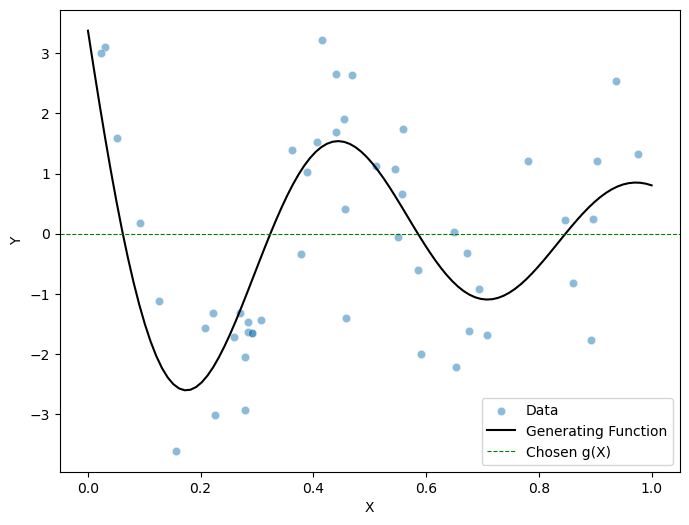

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(3)

n = 50
X = np.random.uniform(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = (np.sin(12 * (X + 0.2))) / (X + 0.2) + epsilon

def generating_fn(x):
    return (np.sin(12 * (x + 0.2))) / (x + 0.2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=Y, alpha=0.5, label='Data')

X_true = np.linspace(0, 1, 100)
Y_true = generating_fn(X_true)
plt.plot(X_true, Y_true, label='Generating Function', color='black')

#at y = 0
plt.axhline(y=0, linestyle='--', color='green', label='Chosen g(X)', linewidth=0.8)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


plt.show()

  (b) $\lambda$ = $\infty$, $m = 1$.
  



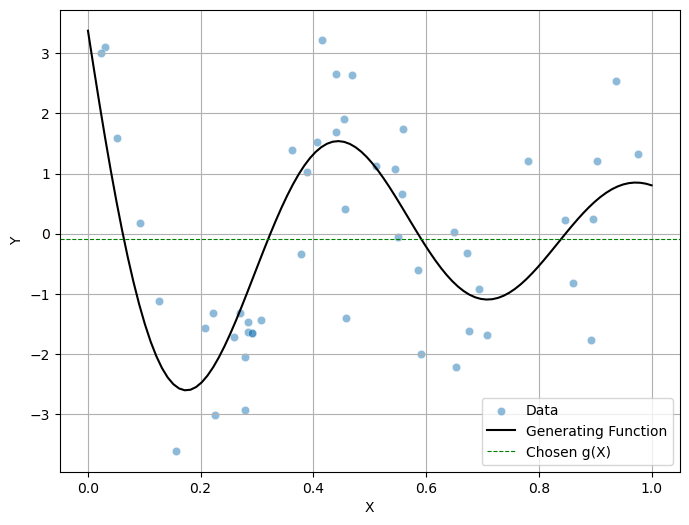

In [2]:
np.random.seed(3)
n = 50
X = np.random.uniform(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = (np.sin(12 * (X + 0.2))) / (X + 0.2) + epsilon

def generating_fn(x):
    return (np.sin(12 * (x + 0.2))) / (x + 0.2)


mean_Y = np.mean(Y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=Y, alpha=0.5, label='Data')

X_true = np.linspace(0, 1, 100)
Y_true = generating_fn(X_true)
plt.plot(X_true, Y_true, label='Generating Function', color='black')

plt.axhline(y=mean_Y, linestyle='--', color='green', label='Chosen g(X)', linewidth=0.8)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

  
  (c) $\lambda$ = $\infty$, $m = 2$.
  

  


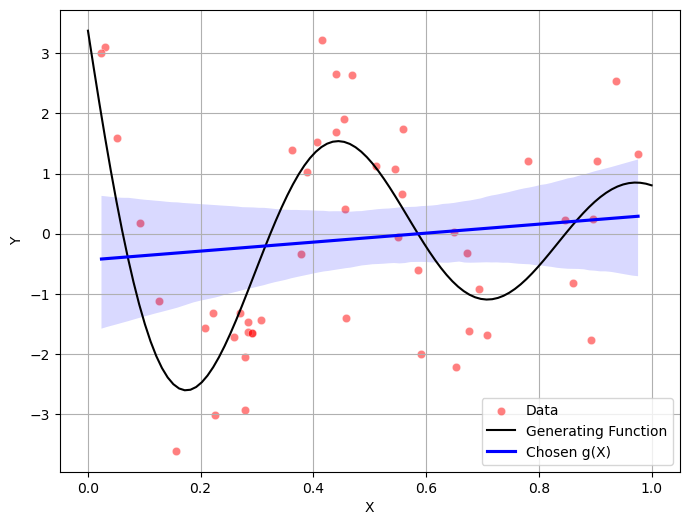

In [3]:
np.random.seed(3)

n = 50
X = np.random.uniform(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = (np.sin(12 * (X + 0.2))) / (X + 0.2) + epsilon

def generating_fn(x):
    return (np.sin(12 * (x + 0.2))) / (x + 0.2)

df = pd.DataFrame({'X': X, 'Y': Y})


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', alpha=0.5, label='Data', color='red')

X_true = np.linspace(0, 1, 100)
Y_true = generating_fn(X_true)
plt.plot(X_true, Y_true, label='Generating Function', color='black')

sns.regplot(data=df, x='X', y='Y', scatter=False, color='green', label='Chosen g(X)', line_kws={'color': 'blue'})

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

  (d) $\lambda$ = $\infty$, $m = 3$.
  


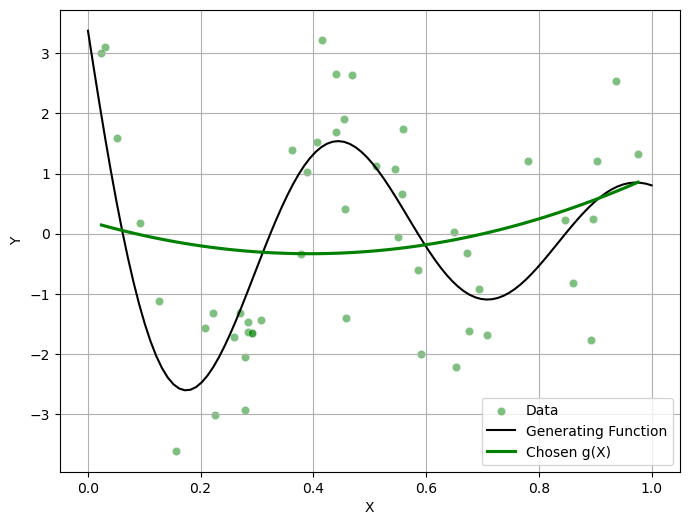

In [4]:
np.random.seed(3)

n = 50
X = np.random.uniform(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = (np.sin(12 * (X + 0.2))) / (X + 0.2) + epsilon

def generating_fn(x):
    return (np.sin(12 * (x + 0.2))) / (x + 0.2)

df = pd.DataFrame({'X': X, 'Y': Y})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', alpha=0.5, label='Data', color='green')

X_true = np.linspace(0, 1, 100)
Y_true = generating_fn(X_true)
plt.plot(X_true, Y_true, label='Generating Function', color='black')

sns.regplot(data=df, x='X', y='Y', scatter=False, color='green', label='Chosen g(X)', order=2, ci=None)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

  
  (e) $\lambda$ = 0, $m = 3$.

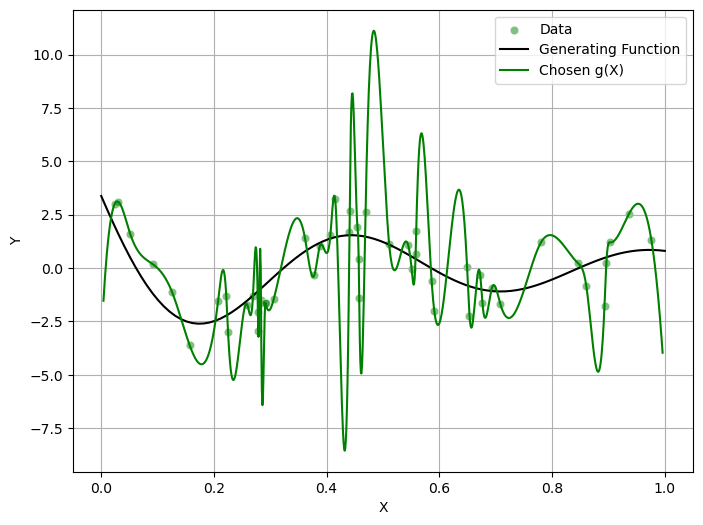

In [5]:
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

#Taking a cubic smoothing spline (with no smoothing) as an example: 

np.random.seed(3)

n = 50
X = np.random.uniform(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = (np.sin(12 * (X + 0.2))) / (X + 0.2) + epsilon

def generating_fn(x):
    return (np.sin(12 * (x + 0.2))) / (x + 0.2)

df = pd.DataFrame({'X': X, 'Y': Y})
df = df.sort_values(by='X')

spline = UnivariateSpline(df['X'], df['Y'], k=3, s=0.0000000000001)

x_values = np.linspace(min(X) - 0.02, max(X) + 0.02, num=1000)
fitted_y = spline(x_values)
fitted_df = pd.DataFrame({'x': x_values, 'fitted_y': fitted_y})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', alpha=0.5, label='Data', color='green')

X_true = np.linspace(0, 1, 100)
Y_true = generating_fn(X_true)
plt.plot(X_true, Y_true, label='Generating Function', color='black')

plt.plot(fitted_df['x'], fitted_df['fitted_y'], label='Chosen g(X)', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()

## APPLIED

pre process the data if required 

In [6]:
import pandas as pd
import numpy as np
import pygam
import matplotlib.pyplot as plt

CollegeData = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/College.csv')
CollegeData.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
CollegeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [8]:
missing_values = CollegeData.isnull().sum()
missing_values

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [9]:
unique_values = CollegeData['Outstate'].unique()
#print(unique_values)

In [10]:
CollegeData = CollegeData.dropna()

In [11]:
!pip install pygam

a) Fit a GAM on the training data, using out-of-state tuition as the response and only subset of features as the predictors ( Select 'private', 'Room.Board' , 'PhD' , 'perc.alumni' , 'Expend' , 'Grad.rate' ) Plot the results and briefly explain your findings

In [12]:
from sklearn.model_selection import train_test_split

CollegeData['Private'] = CollegeData['Private'].map({'Yes': 1, 'No': 0})
SubsetFeatures = ['Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

Y = CollegeData['Outstate']
X = CollegeData[SubsetFeatures]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


gam = pygam.LinearGAM().fit(X_train, y_train)
test_predictions = gam.predict(X_test)
#test_predictions

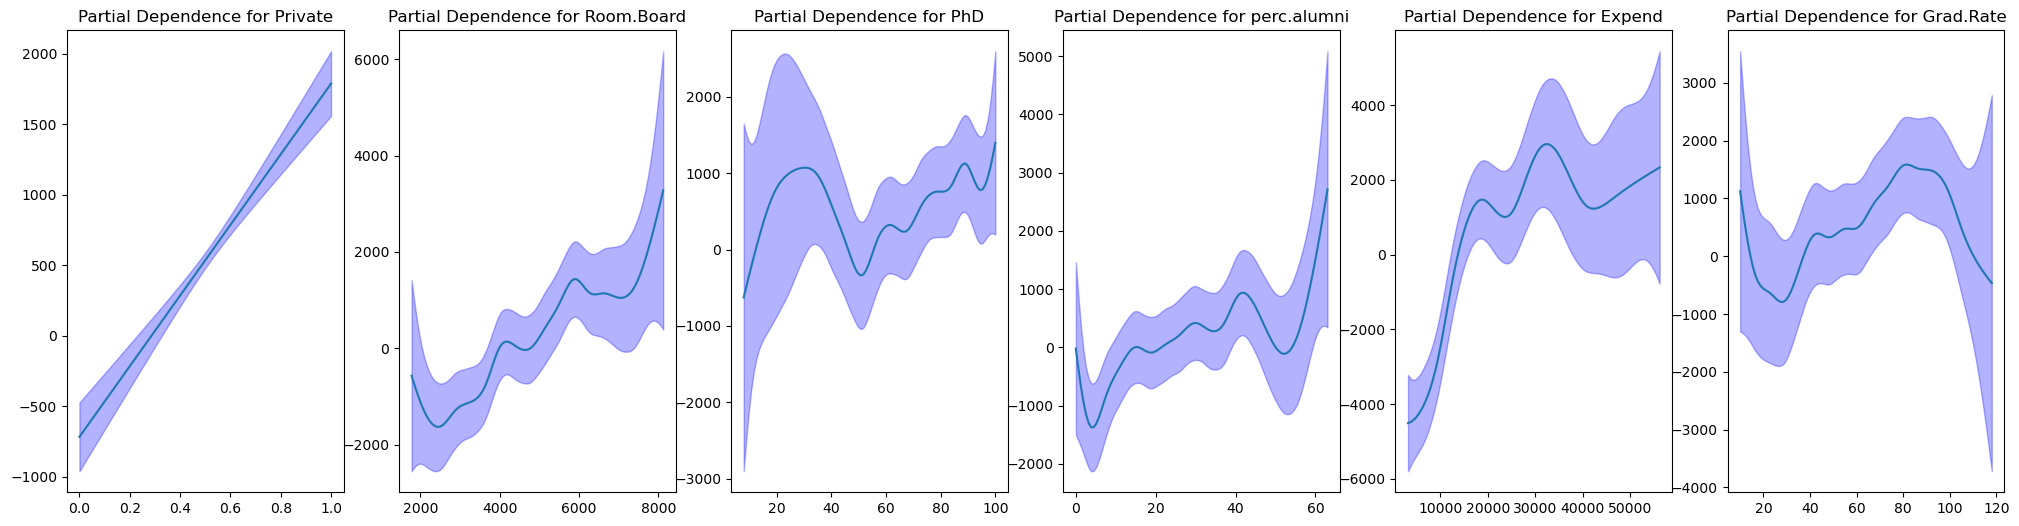

In [13]:
fig, axes = plt.subplots(1, len(SubsetFeatures), figsize=(25, 6))
for i, feature in enumerate(SubsetFeatures):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    axes[i].plot(XX[:, i], pdep)
    axes[i].fill_between(XX[:, i], confi[:, 0], confi[:, 1], color='b', alpha=0.3)
    axes[i].set_title(f'Partial Dependence for {feature}')

plt.show()

- One of the most striking findings from our analysis is that there is clear evidence of non-linear relationships between 'Room.Board,' 'PhD,' 'perc.alumni,' 'Expend,' 'Grad.Rate,' and 'Outstate.' When examining these relationships through the generated plots, the main lines in these cases exhibit pronounced curves, suggesting that the impact of 'Room.Board,' 'PhD,' 'perc.alumni,' 'Expend,' and 'Grad.Rate' on tuition fees is far from linear.

- 'Room.Board' displays a strong positive non-linearity, and this is evident by the substantial upward curve in its main line. The confidence band remains relatively constant along the curve, indicating that the uncertainty in predictions remains consistent.

- 'PhD' exhibits a somewhat slight positive non-linearity, with its main line curving upward as well. The confidence band, however, starts off being quite wide and gradually narrows towards the end of the curve.

- 'perc.alumni' shows positive non-linearity as well, although the effect is relatively subtle. The confidence band remains slightly wider in the middle portion of the curve and becomes narrower towards the beginning and end.

- 'Expend' reveals a strong positive non-linear relationship with 'Outstate.' The main line exhibits a pronounced upward curve, and the confidence band is notably wide at the beginning of the curve, then becomes very wide at the end. This suggests that the predictions for tuition fees have greater uncertainty at the extremes of 'Expend.'

- On the other hand, 'Private' demonstrates evidence of linearity, with a main line that remains relatively straight throughout the range of values.

- 'Grad.Rate' exhibits somewhat neutral non-linearity. The main line shows a slight curve, but the confidence band follows the main line closely, indicating consistent prediction uncertainty.

- In summary, the analysis suggests that 'Room.Board,' 'PhD,' 'perc.alumni,' 'Expend,' and 'Grad.Rate' have non-linear relationships with 'Outstate,' as indicated by the curves in their main lines and the varying patterns of their confidence bands. These findings are crucial for understanding how these predictors influence tuition fees, and they underscore the importance of accounting for non-linearity when modeling such relationships.

**ANSWER**

b) For which variables, if any, is there evidence of a non-linear relationship with the response?

ANSWER

- There is clear evidence of a non-linear relationship between 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate' and 'Outstate' (response). The main line shows a clear curve, indicating a non-linear effect of 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate' on tuition.
- Although, for private  there is evidence of linearity.
- There is strong poistive Non-linearity with Room board 
- There is somewhat slighty positive non-linearity with PhD
- There is positive NL with Perc Alumn 
- Strong positive NL with Expend 
- Somewhat neutral NL with Grade Rate 

## Question 7

Answer the questions below using the following dataset (WEEK3_Q7 CSV provided with the learner template):



a) Only by inspecting the plots shown below: Is there any temporal or spatial trend in the response variable `richness`?

<Axes: xlabel='Year', ylabel='richness'>

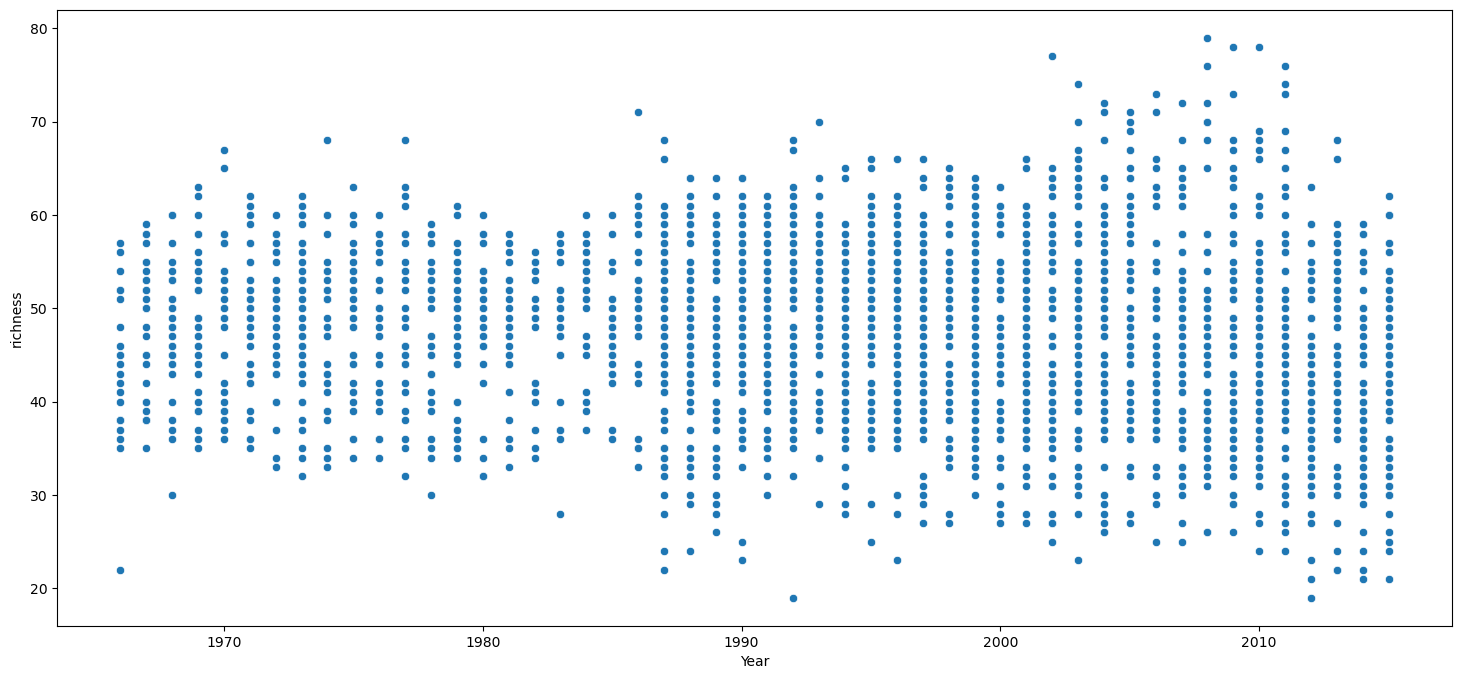

In [14]:
df2 = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/week3_Q7.csv')
plt.figure(figsize=(18, 8))
sns.scatterplot(x=df2.Year,y=df2.richness, alpha = 1)

**ANSWER**
- At first glance it looks like a spatial trend as the data with similar values are close to eachother. But the plot is richness vs years, so in the year 1966 the number richness point stay togther. There is no other factor to support that it is spatial trend. 
- On the other hand, later in 2000-2015 there are more outlier but also the trend is more temporal as the richness increases. If there was a confidence band draw, it would show a wide space in the later parts of 2000. I think the plot suggest a temporal trend. The pattern suggests a consistent change or evolution of the variable over time.

b) Now, fit a Poisson GAM with the following structure `E(richness) = exp(f(year))*exp(g(location))`. Note that location is actually two features: `Longitude` and `Latitude.` Name this model `M1.` 
Plot the model, get the `summary` of `M1`, and answer: Is there evidence for effects of location and year?

In [29]:
import matplotlib.pyplot as plt
from pygam import PoissonGAM, s, f, te


Y = df2['richness']
X = df2[['Year', 'Longitude', 'Latitude']]

M1gam = PoissonGAM(f(0) + s(1) + s(2)).fit(X, Y)

M1gam.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     86.2833
Link Function:                          LogLink Log Likelihood:                                 -9368.7229
Number of Samples:                         2824 AIC:                                            18910.0124
                                                AICc:                                           18915.6457
                                                UBRE:                                               3.0463
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4615
Feature Function                  Lam

/var/folders/hz/4_fpgqjd3sd97f6xccdmf9km0000gn/T/ipykernel_6552/177706247.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  M1gam.summary()


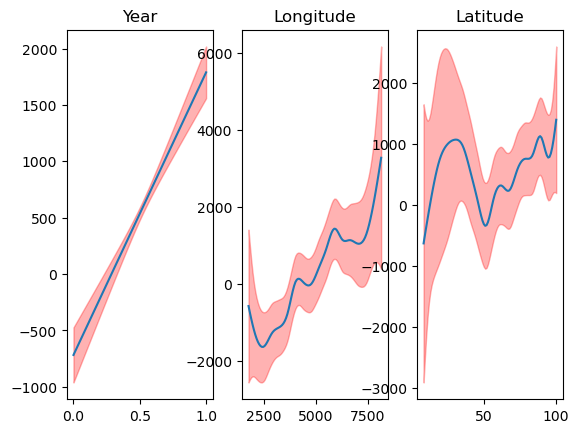

In [31]:
fig, axs = plt.subplots(1, 3)
titles = ['Year', 'Longitude', 'Latitude']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)

    ax.plot(XX[:, i], pdep)
    ax.fill_between(XX[:, i], confi[:, 0], confi[:, 1], color='r', alpha=0.3)
    ax.set_title(titles[i])

**Is there evidence for effects of location and year?**

Yes, from the summary it is evident that there is effects of loaction and year.

- Year (f(0)):
    - The p-value associated with the Year (f(0)) term is very small (1.10e-14). This small p-value suggests strong evidence of an effect associated with the Year variable.
     - The model's effective degrees of freedom (EDoF) for Year is 50, indicating the complexity of the effect.
- Longitude (s(1)):
    - The p-value associated with Longitude (s(1)) is also very small (0.00e+00), which is another strong indicator of an effect.
    - The model's EDoF for Longitude is 18.4, indicating the complexity of the effect.
- Latitude (s(2)):
    - Similar to Longitude, the p-value for Latitude (s(2)) is very small (0.00e+00), suggesting a significant effect.
    - The model's EDoF for Latitude is 17.9, reflecting the complexity of the effect.

c) Now, fit another Poisson GAM model with the same structure as in `M1` , name this model `M2` but using interactions between Year, Latitude and Longitude 

In [32]:
M2gam = PoissonGAM(f(0) + s(1) + s(2) + te(1, 2, n_splines=(20, 20))).fit(X, Y) #used tensor interaction
print(M2gam.summary())

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    132.8248
Link Function:                          LogLink Log Likelihood:                                 -8986.6516
Number of Samples:                         2824 AIC:                                            18238.9528
                                                AICc:                                           18252.3717
                                                UBRE:                                               2.8219
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6132
Feature Function                  Lam

/var/folders/hz/4_fpgqjd3sd97f6xccdmf9km0000gn/T/ipykernel_6552/3828913612.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(M2gam.summary())


d) Compare `M1` and `M2`. Note that you can use the $R^2$, AIC values, test error, among other approaches discussed in class. Which model should we select?

**ANSWER**

- Peudo R-squared: M2 has a higher pseudo R-squared, indicating that it explains a larger proportion of the variance in the data.
- AIC: The AIC value for M2 is lower than that of M1. A lower AIC suggests a better model fit, taking into account the model's complexity.
- UBRE: The UBRE is also lower for M2, which is another indicator of model quality

So in summary, model M2 appears to be a better choice. It has lower AIC, a higher pseudo R-squared, and a lower UBRE